# Análise de correspondência múltipla

## Aluno: Ivan Barbosa Pinheiro
## NUSP: 9050552
# Proposta
Considere o arquivo de dados amostra_banco_distrito.csv disponível em https://github.com/cibelerusso/Datasets/blob/main/amostra_banco_distrito.csv

Você deve desenvolver uma análise de correspondência múltipla, com pelo menos três variáveis, buscando maximizar a inércia total das duas coordenadas principais, $\frac{\sum_{i=1}^{2}\lambda_i}{\sum_{i=1}^{k}\lambda_i^2,$

 em que k é o número total de variáveis adicionadas na análise.

Considere, por exemplo, métodos alternativos para categorizar as variáveis contínuas existentes na base de dados, como técnicas baseadas em análise de agrupamentos. Se achar necessário, pode criar novas variáveis.

Apresente os resultados de suas análises em um arquivo R, Markdown ou notebook Python.

Teste pelo menos três combinações de variáveis na análise e destaque a de maior inércia das duas primeiras coordenadas principais.



# Bibliotecas

In [75]:
pip install prince

In [76]:
# importing the modules
import random
import pandas as pd
import matplotlib.pyplot as plt

from prince import MCA
from sklearn.cluster import DBSCAN
from itertools import combinations
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Leitura da base

In [77]:
# Caminho completo para o arquivo no diretório "sample_data"
file_path = 'https://raw.githubusercontent.com/cibelerusso/Datasets/main/amostra_banco_distrito.csv'

# Ler arquivo CSV
df = pd.read_csv(file_path)

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cliente             500 non-null    int64 
 1   Sexo                500 non-null    object
 2   Idade               500 non-null    int64 
 3   Empresa             500 non-null    object
 4   Salario             500 non-null    object
 5   Saldo_cc            500 non-null    object
 6   Saldo_poupança      500 non-null    object
 7   Saldo_investimento  500 non-null    object
 8   Devedor_cartao      500 non-null    object
 9   Inadimplente        500 non-null    int64 
 10  Distrito            500 non-null    object
dtypes: int64(3), object(8)
memory usage: 43.1+ KB


None

In [78]:
display(df)

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,Distrito
0,106,F,32,Autônomo,6162,"-372,36",0,0,"1736,56",1,IPIRANGA
1,310,M,34,Privada,"3898,3","-45,74",0,0,"3567,22",1,ITAQUERA
2,431,F,28,Privada,5517,"-527,95",0,0,"2722,83",1,PENHA
3,590,F,28,Pública,"5546,2","907,92",0,0,"114,49",0,VILA PRUDENTE
4,971,F,32,Pública,5276,"1143,71",0,0,647,0,PENHA
...,...,...,...,...,...,...,...,...,...,...,...
495,98661,M,31,Privada,5841,"878,31",0,0,"1588,36",0,ARICANDUVA-FORMOSA-CARRAO
496,99693,F,33,Privada,5523,"907,84",0,0,"1888,18",0,ARICANDUVA-FORMOSA-CARRAO
497,99951,F,33,Privada,5862,"1269,47",0,0,92,0,ITAIM PAULISTA
498,99956,F,35,Privada,"6218,4","883,14",0,0,"1856,47",0,BUTANTA


# Pré - processamento

In [79]:
continuous_variables = ['Idade', 'Salario', 'Saldo_cc']

In [80]:
df['Salario'] = df['Salario'].str.replace(',', '.').astype(float)
df['Saldo_cc'] = df['Saldo_cc'].str.replace(',', '.').astype(float)
df['Devedor_cartao'] = df['Devedor_cartao'].str.replace(',', '.').astype(float)

In [81]:
display(df)

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,Distrito
0,106,F,32,Autônomo,6162.0,-372.36,0,0,1736.56,1,IPIRANGA
1,310,M,34,Privada,3898.3,-45.74,0,0,3567.22,1,ITAQUERA
2,431,F,28,Privada,5517.0,-527.95,0,0,2722.83,1,PENHA
3,590,F,28,Pública,5546.2,907.92,0,0,114.49,0,VILA PRUDENTE
4,971,F,32,Pública,5276.0,1143.71,0,0,647.00,0,PENHA
...,...,...,...,...,...,...,...,...,...,...,...
495,98661,M,31,Privada,5841.0,878.31,0,0,1588.36,0,ARICANDUVA-FORMOSA-CARRAO
496,99693,F,33,Privada,5523.0,907.84,0,0,1888.18,0,ARICANDUVA-FORMOSA-CARRAO
497,99951,F,33,Privada,5862.0,1269.47,0,0,92.00,0,ITAIM PAULISTA
498,99956,F,35,Privada,6218.4,883.14,0,0,1856.47,0,BUTANTA


In [82]:
# Normalizar os dados (importante para o K-means)
scaler = StandardScaler()
df[continuous_variables] = scaler.fit_transform(df[continuous_variables])

In [83]:
display(df)

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,Distrito
0,106,F,-0.038021,Autônomo,0.268025,-2.215993,0,0,1736.56,1,IPIRANGA
1,310,M,0.606401,Privada,-0.992519,-1.516346,0,0,3567.22,1,ITAQUERA
2,431,F,-1.326864,Privada,-0.091144,-2.549280,0,0,2722.83,1,PENHA
3,590,F,-1.326864,Pública,-0.074884,0.526473,0,0,114.49,0,VILA PRUDENTE
4,971,F,-0.038021,Pública,-0.225345,1.031554,0,0,647.00,0,PENHA
...,...,...,...,...,...,...,...,...,...,...,...
495,98661,M,-0.360232,Privada,0.089276,0.463046,0,0,1588.36,0,ARICANDUVA-FORMOSA-CARRAO
496,99693,F,0.284190,Privada,-0.087803,0.526301,0,0,1888.18,0,ARICANDUVA-FORMOSA-CARRAO
497,99951,F,0.284190,Privada,0.100970,1.300943,0,0,92.00,0,ITAIM PAULISTA
498,99956,F,0.928611,Privada,0.299432,0.473392,0,0,1856.47,0,BUTANTA


In [84]:
df_encoded = pd.get_dummies(df)

In [85]:
display(df_encoded)

,Cliente,Idade,Salario,Saldo_cc,Devedor_cartao,Inadimplente,Sexo_F,Sexo_M,Empresa_Autônomo,Empresa_Privada,...,Distrito_PIRITUBA-JARAGUA,Distrito_SANTANA-TUCURUVI,Distrito_SANTO AMARO,Distrito_SAO MATEUS,Distrito_SAO MIGUEL,Distrito_SAPOPEMBA,Distrito_SE,Distrito_VILA MARIA-VILA GUILHERME,Distrito_VILA MARIANA,Distrito_VILA PRUDENTE
0,106,-0.038021,0.268025,-2.215993,1736.56,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,310,0.606401,-0.992519,-1.516346,3567.22,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,431,-1.326864,-0.091144,-2.549280,2722.83,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,590,-1.326864,-0.074884,0.526473,114.49,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,971,-0.038021,-0.225345,1.031554,647.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,98661,-0.360232,0.089276,0.463046,1588.36,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
496,99693,0.284190,-0.087803,0.526301,1888.18,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
497,99951,0.284190,0.100970,1.300943,92.00,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
498,99956,0.928611,0.299432,0.473392,1856.47,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Agrupamento K-means

In [86]:
# Aplicar o algoritmo de clustering (K-means) para categorização
num_clusters = 3  # Definir o número de clusters desejados
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_encoded['Categoria_Clustering'] = kmeans.fit_predict(df_encoded[continuous_variables])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Agrupamento DBSCAN

In [87]:
# Aplicar o algoritmo DBSCAN para categorização
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_encoded['Categoria_Clustering_DBSCAN'] = dbscan.fit_predict(df_encoded[continuous_variables])

# Agrupamento Agglomerative

In [88]:
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
df_encoded['Categoria_Clustering_Agglomerative'] = agg_clustering.fit_predict(df_encoded[continuous_variables])

# Análise de correspondência múltipla

Resultados da Análise de Correspondência Múltipla com 3 variáveis:
            0         1
0   -0.146941  0.203100
1   -0.081394 -0.185363
2   -0.149397  0.120157
3   -0.116736  0.269505
4   -0.121874  0.223620
..        ...       ...
495 -0.065913 -0.168967
496 -0.112752 -0.001485
497 -0.111186 -0.001168
498 -0.086387 -0.006884
499 -0.179593  0.201436

[500 rows x 2 columns]


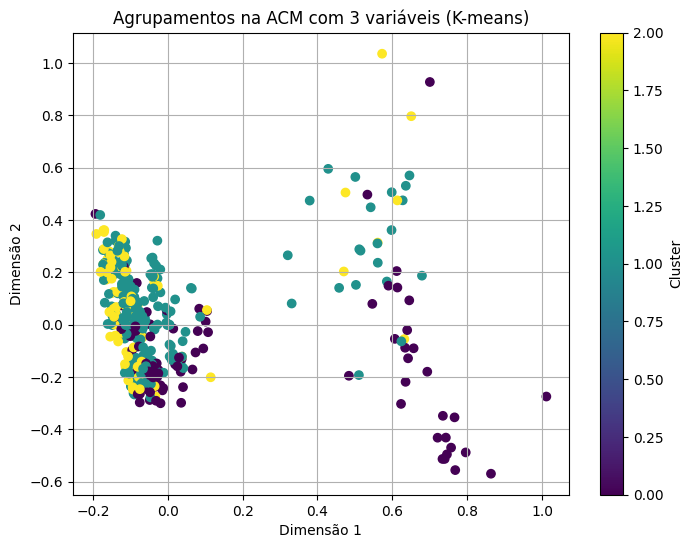

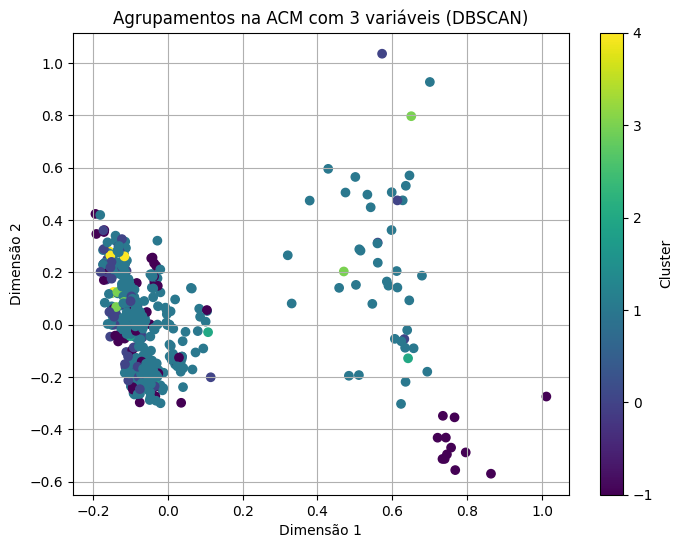

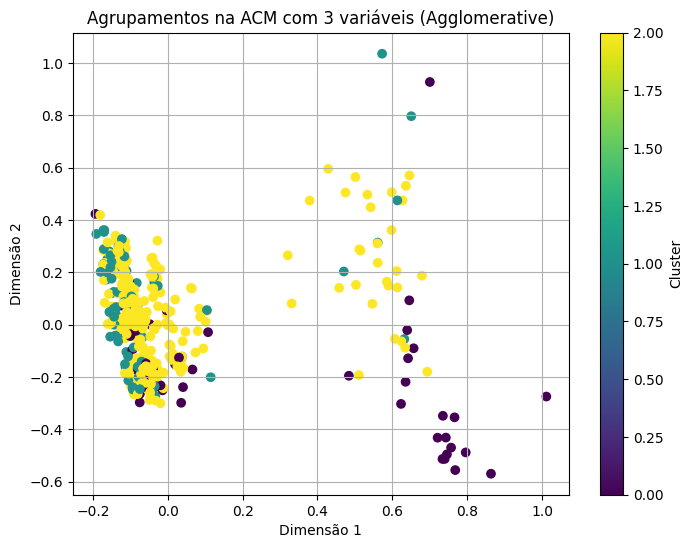

In [92]:
mca = MCA(n_components=2)
mca.fit(df_encoded.drop(['Categoria_Clustering', 'Categoria_Clustering_DBSCAN', 'Categoria_Clustering_Agglomerative'], axis=1))  # Remover colunas de categorização

# Resultados da ACM com a terceira variável
print('Resultados da Análise de Correspondência Múltipla com 3 variáveis:')
print(mca.row_coordinates(df_encoded.drop(['Categoria_Clustering', 'Categoria_Clustering_DBSCAN', 'Categoria_Clustering_Agglomerative'], axis=1)))

# Coordenadas dos indivíduos na ACM com a terceira variável
coordinates_acm_additional = mca.row_coordinates(df_encoded.drop(['Categoria_Clustering', 'Categoria_Clustering_DBSCAN', 'Categoria_Clustering_Agglomerative'], axis=1))

# Plotagem dos agrupamentos na ACM com a terceira variável
plt.figure(figsize=(8, 6))
plt.scatter(coordinates_acm_additional.iloc[:, 0], coordinates_acm_additional.iloc[:, 1], c=df_encoded['Categoria_Clustering'], cmap='viridis')
plt.title('Agrupamentos na ACM com 3 variáveis (K-means)')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Plotagem dos agrupamentos na ACM com a terceira variável
plt.figure(figsize=(8, 6))
plt.scatter(coordinates_acm_additional.iloc[:, 0], coordinates_acm_additional.iloc[:, 1], c=df_encoded['Categoria_Clustering_DBSCAN'], cmap='viridis')
plt.title('Agrupamentos na ACM com 3 variáveis (DBSCAN)')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Plotagem dos agrupamentos na ACM com a terceira variável
plt.figure(figsize=(8, 6))
plt.scatter(coordinates_acm_additional.iloc[:, 0], coordinates_acm_additional.iloc[:, 1], c=df_encoded['Categoria_Clustering_Agglomerative'], cmap='viridis')
plt.title('Agrupamentos na ACM com 3 variáveis (Agglomerative)')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [91]:
# Lista de todas as combinações possíveis de 3 variáveis
variable_combinations = list(combinations(df_encoded.columns[:-3], 3))

# Definir o número de combinações a serem testadas
num_combinations_to_test = 1000

max_inertia = 0
best_combination = None

# Amostragem aleatória de combinações
random_combinations = random.sample(variable_combinations, num_combinations_to_test)

for combination in random_combinations:
    mca_combination = MCA(n_components=2)
    mca_combination.fit(df_encoded[list(combination)])
    inertia = sum(mca_combination.eigenvalues_[:2])  # Somando os dois primeiros autovalores para calcular a inércia
    if inertia > max_inertia:
        max_inertia = inertia
        best_combination = combination

print(f"A melhor combinação de variáveis com maior inércia das duas primeiras coordenadas principais: {best_combination}")

A melhor combinação de variáveis com maior inércia das duas primeiras coordenadas principais: ('Cliente', 'Devedor_cartao', 'Empresa_Privada')
